# **import necessary libraries**

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
# download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Install required libraries**

In [4]:
# Install required libraries
!pip install pyarabic
!pip install tashaphyne
!pip install pandas
!pip install sklearn
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 6.4 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=

In [5]:
pip install emoji --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 7.9 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.1-py2.py3-none-any.whl size=351223 sha256=dd0f309190a75f2288b104f2e2ace0681b319f38ee4ca34e0398753cee46543b
  Stored in directory: /root/.cache/pip/wheels/51/92/44/e2ef13f803aa08711819357e6de0c5fe67b874671141413565
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.5.0
    Uninstalling emoji-2.5.0:
      Successfully uninstalled emoji-2.5.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import necessary libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
from pyarabic.araby import strip_tashkeel
from tashaphyne.stemming import ArabicLightStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
# Add environment Packages paths to conda
import os, sys, warnings
import pandas as pd
import numpy as np
warnings.simplefilter("ignore")

# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
import regex
import emoji
# Corpora is a group presenting multiple collections of text documents. A single collection is called corpus.
from nltk.corpus import stopwords # Stopwords
# import arabicstopwords.arabicstopwords as stp #more range of arabic stop words
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from tashaphyne.stemming import ArabicLightStemmer

from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
#from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC
# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

# **load the dataset**

In [7]:
# load the dataset
df = pd.read_csv("/kaggle/input/chat-gpt/chat_tweet_prr.csv")
df.head()

,text,Sentiment
0,بوتيم تطلق أول منصة عربية لمحادثة الذكاء الاصط...,1.0
1,قوقل والذكاء الصناعي شات جي بي تي الان صاروا ف...,1.0
2,@nin8d حتى انا استخدم شات جي بي تي بس اشوف الن...,0.0
3,@Medhat_Amer استاذ مدحت .. هل ترى ان شات جي بي...,0.0
4,متاجر التطبيقات في الأيفون والأندرويد وتوفر ا...,1.0


In [8]:
#check if the data is balanced or not
df.Sentiment.value_counts()

1.0    1473
0.0     774
Name: Sentiment, dtype: int64

In [9]:
missing_count = df['Sentiment'].isnull().sum()
print("Missing value count:", missing_count)
df.dropna(subset=['Sentiment'], inplace=True)


Missing value count: 1


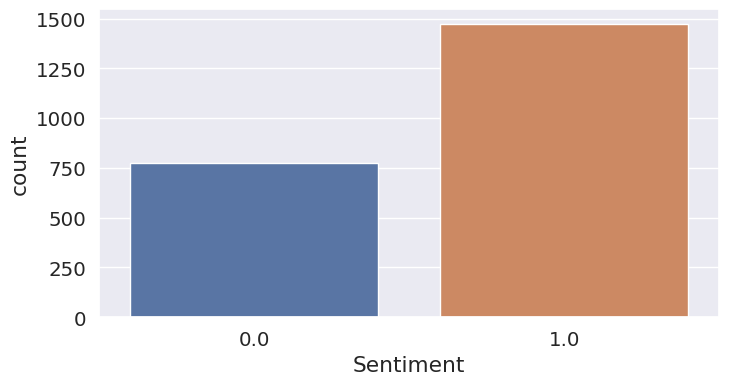

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x='Sentiment', data=df);

In [11]:
df = df.dropna(subset=['Sentiment'])


In [12]:
#print the number of null values in each column
df.isnull().sum()

text         0
Sentiment    0
dtype: int64

In [13]:
#to get the index of the null value
df[df['text'].isnull() == True]

,text,Sentiment


In [14]:
#print the number of duplicated values
df.duplicated().sum()

24

In [15]:
#print the rows which are duplicated
df[df['text'].duplicated() == True]

,text,Sentiment
19,متاجر التطبيقات في الأيفون والأندرويد وتوفر ا...,1.0
20,سألنا شات جي بي تي كيف ممكن نستفادوا منه في ت...,1.0
21,محتاجين لهاكاثون في ليبيا ولو كان أفتراضي يتم ...,1.0
107,د.خالد الغنيم يعطي مثال على عدم مصداقية المعلو...,0.0
579,#ChatGPT في السعودية\n#openai\n#BingAI \n#chat...,1.0
929,ChatGPT-4 شات جي بي تي مميزات جديده في الاصدار...,1.0
930,شات جي بي تي 4 بيدعم الصور، وعملوا تجربة في ال...,1.0
931,شات جي بي تي يتوقع بكرى انهيار للأسواق، نتابع ...,1.0
1131,اطلب حسابك الان! \n\n #شات_جي_بي_تي,1.0
1468,يعتقد مخترع الإنترنت تيم بيرنرز لي أن كل فرد ف...,1.0


In [16]:
df[df['text'] == df.iloc[76]['text']]

,text,Sentiment
76,@96_null هو شات جى بى تى ممنوع فى مصر ولا إيه,0.0


In [17]:
#removing duplicated values
index = df[df['text'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('arabic'))

#are there any stop words in the data?
arabic_stopwords = stopwords.words("arabic")
# len(arabic_stopwords)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df['stop_words'] = df['text'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
df.stop_words.value_counts()

2     432
3     400
4     254
5     219
1     212
6     189
7     168
8      91
9      80
0      73
10     38
11     28
12     15
13     12
14      6
17      1
16      1
Name: stop_words, dtype: int64

<Axes: ylabel='Frequency'>

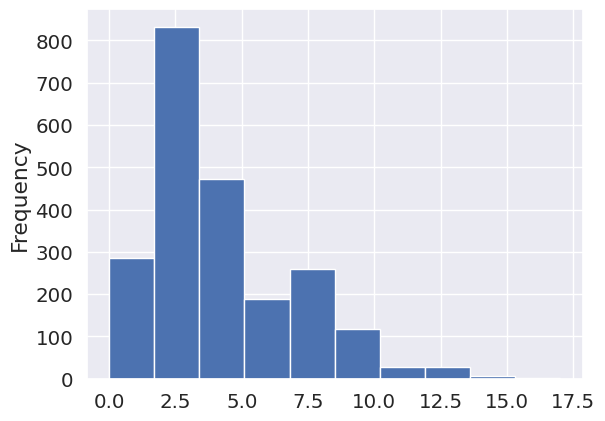

In [19]:
df['stop_words'].plot(kind= 'hist')

In [20]:
#to count the number of emojis in the dataset
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

df['emoji_count'] = df['text'].apply(lambda x: emoji_counter(x))
df.emoji_count.value_counts()[:10]

0     1886
1      205
2       69
3       36
4       10
8        4
7        3
5        2
6        2
23       1
Name: emoji_count, dtype: int64

# **extract the emojis from every text**

In [21]:
# print(emojis_data)
import pandas as pd
import regex
import emoji

def extract_emoji(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        try:
            if any(emoji.distinct_emoji_list(char) for char in word):
                emoji_list.append(word)
        except IndexError:
            pass
    return emoji_list

emojis_data = df[df['emoji_count'] > 0]
emojis_data['emoji'] = emojis_data['text'].apply(lambda x: extract_emoji(x))
emojis_data['emoji'] = emojis_data['emoji'].apply(lambda x: ' '.join(word for word in x))

emojis_data


,text,Sentiment,stop_words,emoji_count,emoji
1,قوقل والذكاء الصناعي شات جي بي تي الان صاروا ف...,1.0,6,3,👇 👇 👇
2,@nin8d حتى انا استخدم شات جي بي تي بس اشوف الن...,0.0,5,1,🏃🏻‍♀️
15,@Eyaaaad @Hassanalsobhan حبيبي هذا تفوق على شا...,0.0,4,2,🤣 🤣
16,هو شات جي بي تي دا ميعرفش يغير الملايات ويشطب ...,0.0,3,1,🥺
33,لا تسأل ChatGPT عن حلول لمعاناة نفسية أو مشكلة...,0.0,9,1,🔴
...,...,...,...,...,...
2216,@Ali_Albukhaiti هذا شات جي بي تي صحونجي 😂😂,0.0,3,2,😂 😂
2217,ازدياد عمليات البحث في إيطاليا عن VPN بعد حظر ...,0.0,5,1,😎
2220,🔴 شات جي بي تي GhatGPT\n\n📌 ملخص جميل عجبني من...,0.0,8,3,🔴 📌 📌
2223,موظف في سامسونج اعتمد على شات جي بي تي لحل مسا...,0.0,6,1,😬


In [22]:
#find most repeated emojis
pd.Series(' '.join(emojis_data['emoji']).split()).value_counts()[:10]

😂     84
👇     59
🤖     22
🤣     20
▪     17
👇🏻    15
😭     13
🔥     13
😅     12
▪️    12
dtype: int64

# **Cleaning**

In [23]:
emojis = {
    "🙂":"يبتسم",
    "▪️":"مربع",
    "🤣":"يضحك",
    "🤖":"روبوت",
    "▪":"مربع",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"حزين",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
    "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",
    "🎀":    "ورده",
    "💵":  "فلوس",
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "💉":"دواء",
    "🙏🏼":"رجاء طلب",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضربة",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "🔥":"حريق",
    "😬":"عدم الراحة",
    "👊🏿":"يضرب",
    "🌿":"ورقه شجره",
    "✋🏼":"كف ايد",
    "👐":"ايدي مفتوحه",
    "☠️":"وجه مرعب",
    "🎉":"يهنئ",
    "🔕" :"صامت",
    "😿":"وجه حزين",
    "☹️":"وجه يائس",
    "😘" :"حب",
    "😰" :"خوف و حزن",
    "🌼":"ورده",
    "💋":  "بوسه",
    "👇":"لاسفل",
    "❣️":"حب",
    "🎧":"سماعات",
    "📝":"يكتب",
    "😇":"دايخ",
    "😈":"رعب",
    "🏃":"يجري",
    "✌🏻":"علامه النصر",
    "🔫":"يضرب",
    "❗️":"تعجب",
    "👎":"غير موافق",
    "🔐":"قفل",
    "👈":"لليمين",
    "™":"رمز",
    "🚶🏽":"يتمشي",
    "😯":"متفاجأ",
    "✊":"يد مغلقه",
    "😻":"اعجاب",
    "🙉" :"قرد",
    "👧":"طفله صغيره",
    "🔴":"دائره حمراء",
    "💪🏽":"قوه",
    "💤":"ينام",
    "👀":"ينظر",
    "✍🏻":"يكتب",
    "❄️":"تلج",
    "💀":"رعب",
    "😤":"وجه عابس",
    "🖋":"قلم",
    "🎩":"كاب",
    "☕️":"قهوه",
    "😹":"ضحك",
    "💓":"حب",
    "☄️ ":"نار",
    "👻":"رعب",
    }

emoticons_to_emoji = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "موسيقي",
    "♡" : "❤",
    "☻"  : "🙂",
    }

In [24]:
def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

def ISRI_Stemmer(text):
    #making an object
    stemmer = ISRIStemmer()

    #stemming each word
    text = stemmer.stem(text)
    text = stemmer.pre32(text)
    text = stemmer.suf32(text)

    return text

def Snowball_stemmer(text):
    text = text.split()
    #making an object
    stemmer = SnowballStemmer("arabic")

    #stemming each word
    text=[stemmer.stem(y) for y in text]

    return " " .join(text)

def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()

    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]

    return " " .join(text)

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    #remove repetetions
    text = re.sub("[إأٱآا]", "ا", text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('ييي', 'ي')
    text = text.replace('اا', 'ا')

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)

    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text)

    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)

    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emoji(string):

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string).strip()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text).strip()



def remove_extra_Space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan


def replace_emoticon_with_emojis(text):
    for i in range (len(text)):
        message = text.iloc[i]
        seperarate_word = message.split(' ')
        cleaned_data.text.iloc[i] = ""

        for word in seperarate_word:
            text.iloc[i] += emoticons_to_emoji.get(word, word) + " "

def replace_emojis_with_text(text):
    for i in range (len(text)):
            message = text.iloc[i]
            seperarate_word = regex.findall(r'\X', message)
            text.iloc[i] = ""

            for word in seperarate_word:
                if any(emoji.distinct_emoji_list(char)  for char in word):
                        text.iloc[i] += " " + emojis.get(word, word) + " "
                else:
                        text.iloc[i] +=  emojis.get(word, word) + ""



def space_between_emojis(s):
    return ''.join((' '+c+' ') if c in emoji.UNICODE_EMOJI['en'] else c for c in s)

def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text


In [25]:
cleaned_data = pd.read_csv("/kaggle/input/chat-gpt/chat_tweet_prr.csv")
cleaned_data.rename(columns = { 'Sentiment':'label'}, inplace = True)

In [26]:
cleaned_data.head()

,text,label
0,بوتيم تطلق أول منصة عربية لمحادثة الذكاء الاصط...,1.0
1,قوقل والذكاء الصناعي شات جي بي تي الان صاروا ف...,1.0
2,@nin8d حتى انا استخدم شات جي بي تي بس اشوف الن...,0.0
3,@Medhat_Amer استاذ مدحت .. هل ترى ان شات جي بي...,0.0
4,متاجر التطبيقات في الأيفون والأندرويد وتوفر ا...,1.0


In [27]:
missing_count = cleaned_data['label'].isnull().sum()
print("Missing value count:", missing_count)
cleaned_data.dropna(subset=['label'], inplace=True)

Missing value count: 1


# **removing duplicated values**

In [28]:
num_of_duplications = cleaned_data.duplicated().sum()
index = cleaned_data[cleaned_data['text'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

#Before
num_of_duplications
print("**********************************************************")
#Ater
cleaned_data.duplicated().sum()

**********************************************************


0

# **Replace emoticons with emojis**

In [29]:
import emoji

def replace_emojis_with_text(text):
    return emoji.demojize(text)

# Before
print(df.iloc[0].text)

# After
cleaned_data['text'] = cleaned_data['text'].apply(lambda text: replace_emojis_with_text(text))
print(cleaned_data.iloc[0].text)


بوتيم تطلق أول منصة عربية لمحادثة الذكاء الاصطناعي شات جي بي تي في الشرق الأوسط https://t.co/mPbhP3s5l6
بوتيم تطلق أول منصة عربية لمحادثة الذكاء الاصطناعي شات جي بي تي في الشرق الأوسط https://t.co/mPbhP3s5l6


# **removing arabic stopwords**

In [30]:
cleaned_data.text=cleaned_data.text.apply(lambda text : remove_stop_words(text))

# **Removal of non-Arabic words**

In [31]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_non_arabic(text))

#Before
df.text.iloc[1]

#After
cleaned_data.iloc[1].text

'قوقل والذكاء الصناعي شات جي الان صاروا محرك بحث : _ _ _ :: _ _ _ :: _ _ _ :  :// . / 6 3 7   :// . / 0 6'

# **removing Diacritics**

In [32]:
cleaned_data.text=cleaned_data.text.apply(lambda text : normalizeArabic(text))

# **Removal of numbers**

In [33]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_numbers(text))

#After
cleaned_data.iloc[1].text

'قوقل والذكاء الصناعي شات جي الان صاروا محرك بحث : _ _ _ :: _ _ _ :: _ _ _ : :// . /    :// . /  '


# **Removing Hastags**

In [34]:
cleaned_data.text=cleaned_data.text.apply(lambda text : remove_hashtages_and_mentions(text))

# **Removal of Links**

In [35]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_urls(text))

# **Removing Punctuations**

In [36]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_punctuations(text))

In [37]:
cleaned_data

,text,label
0,بوتيم تطلق منصه عربيه لمحادثه الذكاء الاصطناعي...,1.0
1,قوقل والذكاء الصناعي شات جي الان صاروا محرك بحث,1.0
2,انا استخدم شات جي اشوف الناس الموضوع صاير عنده...,0.0
3,استاذ مدحت تري ان شات جي اكبر مهدد لوظاءف التق...,0.0
4,متاجر التطبيقات الايفون والاندرويد وتوفر الهوا...,1.0
...,...,...
2214,شات جي يعاني قصور فهم السياق والاستجابه بشكل م...,0.0
2215,التجربه شات جي كانت مرضيه يتلقي الكثير الاسءله...,0.0
2216,شات جي يعاني نقص التفاعل البشري يفتقد القدره ا...,0.0
2217,يتعذر شات جي التعامل الاسءله المعقده المحادثات...,0.0



# **Reducing words to their roots**

In [38]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Arabic_Light_Stemmer(text))

cleaned_data.duplicated().sum()

109

In [39]:
index = cleaned_data[cleaned_data['text'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

In [40]:
cleaned_data.duplicated().sum()
cleaned_data

,text,label
0,وتيم طلق منص عرب محادث ذكاء اصطناع شا جي شرق اوسط,1.0
1,قوقل ذكاء صناع شا جي ان صار محر حث,1.0
2,نا ستخدم شا جي شوف ناس موضوع صاير عند محتو,0.0
3,استاذ مدح ري ان شا جي كبر مهدد وظاءف تقنيه اخص...,0.0
4,متاجر تطبيق ايف اندرويد وفر هواتف يد ناس ساهم ...,1.0
...,...,...
2097,شا جي عا قصور هم سياق استجابه شكل منطق بدو نه ...,0.0
2098,تجربه شا جي انت مرض تلقي كثير اسءله دون جاب من...,0.0
2099,شا جي عا قص تفاعل بشر فتقد قدره تعاطف تفاعل طر...,0.0
2100,تعذر شا جي تعامل اسءله معقده محادث متداخله شكل...,0.0


In [41]:
#this function will convert the text which contains one or two words into null value
remove_small_sentences(cleaned_data)

In [42]:
cleaned_data.isnull().sum()

text     2
label    0
dtype: int64

In [43]:

cleaned_data.dropna(inplace = True)
cleaned_data

,text,label
0,وتيم طلق منص عرب محادث ذكاء اصطناع شا جي شرق اوسط,1.0
1,قوقل ذكاء صناع شا جي ان صار محر حث,1.0
2,نا ستخدم شا جي شوف ناس موضوع صاير عند محتو,0.0
3,استاذ مدح ري ان شا جي كبر مهدد وظاءف تقنيه اخص...,0.0
4,متاجر تطبيق ايف اندرويد وفر هواتف يد ناس ساهم ...,1.0
...,...,...
2097,شا جي عا قصور هم سياق استجابه شكل منطق بدو نه ...,0.0
2098,تجربه شا جي انت مرض تلقي كثير اسءله دون جاب من...,0.0
2099,شا جي عا قص تفاعل بشر فتقد قدره تعاطف تفاعل طر...,0.0
2100,تعذر شا جي تعامل اسءله معقده محادث متداخله شكل...,0.0


In [44]:
X = cleaned_data.text.values
y = cleaned_data.label.values

In [45]:
!pip install nltk


In [46]:
# import re
# import emoji
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import nltk

# # download Arabic stop words
# nltk.download('stopwords')
# stop_words = stopwords.words('arabic')

# def preprocess_text(text):
#     # remove punctuations and special characters
#     text = re.sub(r'[^\w\s]', '', text)

#     # remove English
#     text = re.sub(r'[A-Za-z]+', '', text)

#      # Remove diacritics
#     text = strip_tashkeel(text)

#       # Stem text
#     st = ArabicLightStemmer()
#     text = ' '.join([st.light_stem(word) for word in text.split()])

#     # translate emojis to text
#     text = emoji.demojize(text)

#     # tokenize the text into words
#     tokens = word_tokenize(text)
#        # remove @ symbol
#     text = re.sub(r'@', '', text)

#     # remove stop words
#     filtered_tokens = [token for token in tokens if token not in stop_words]

#     # join the tokens back into a string
#     text = " ".join(filtered_tokens)

#     return text

In [47]:
# # Apply preprocessing to text column
# df['text'] = df['text'].apply(preprocess_text)

In [48]:
pip install python-bidi


Note: you may need to restart the kernel to use updated packages.


In [49]:
!pip install arabic-reshaper


In [50]:
# from nltk.corpus import stopwords
# stopwords_list = stopwords.words('arabic')

# **Split dataset into training and testing sets**

In [51]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Sentiment'], test_size=0.2, random_state=42)

# **Extract features from text using CountVectorizer and TfidfTransformer and SMOTE**

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE

# Convert text data to numerical features using CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

# Apply TF-IDF transformation to the numerical features
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=9)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train.ravel())

# Continue with the rest of your code using X_train_resampled and y_train_resampled


In [53]:

print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train==1)))


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))

Before OverSampling, counts of label '0': 619
Before OverSampling, counts of label '1': 1156 

After OverSampling, the shape of train_X: (2312, 11560)
After OverSampling, the shape of train_y: (2312,) 

After OverSampling, counts of label '0': 1156
After OverSampling, counts of label '1': 1156


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size= 0.2, random_state= 0)

# **All models by deafult**

multinomialnb
              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82       155
         1.0       0.93      0.72      0.81       192

    accuracy                           0.82       347
   macro avg       0.83      0.83      0.82       347
weighted avg       0.84      0.82      0.82       347

Accuracy: 0.8155619596541787


svc
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       155
         1.0       0.89      0.85      0.87       192

    accuracy                           0.86       347
   macro avg       0.86      0.86      0.86       347
weighted avg       0.86      0.86      0.86       347

Accuracy: 0.861671469740634


logisticregression
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       155
         1.0       0.88      0.81      0.84       192

    accuracy                           0.83       347
   macro avg       0.83      0

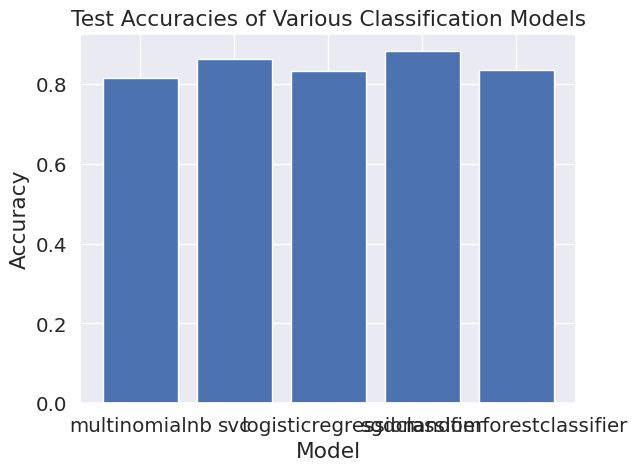

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define a list of classification models to train and evaluate
models = [
    MultinomialNB(),
    SVC(kernel='linear'),
    LogisticRegression(),
    SGDClassifier(loss='hinge', penalty='l2'),
    RandomForestClassifier(n_estimators=100)
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_name = type(model).__name__.lower()
    print(model_name)
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n")

# Plot the comparison of the test accuracies of each model
names = [type(model).__name__.lower() for model in models]
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models]
plt.bar(names, accuracies)
plt.title("Test Accuracies of Various Classification Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


# **Grid Search**

# **NB**

Best Parameters: {'alpha': 0.01}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       155
         1.0       0.94      0.83      0.88       192

    accuracy                           0.87       347
   macro avg       0.87      0.88      0.87       347
weighted avg       0.88      0.87      0.87       347

Accuracy: 0.8731988472622478


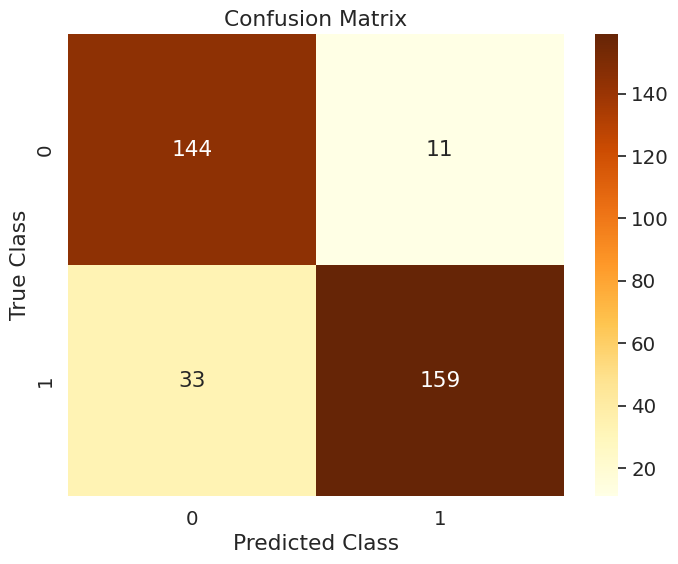

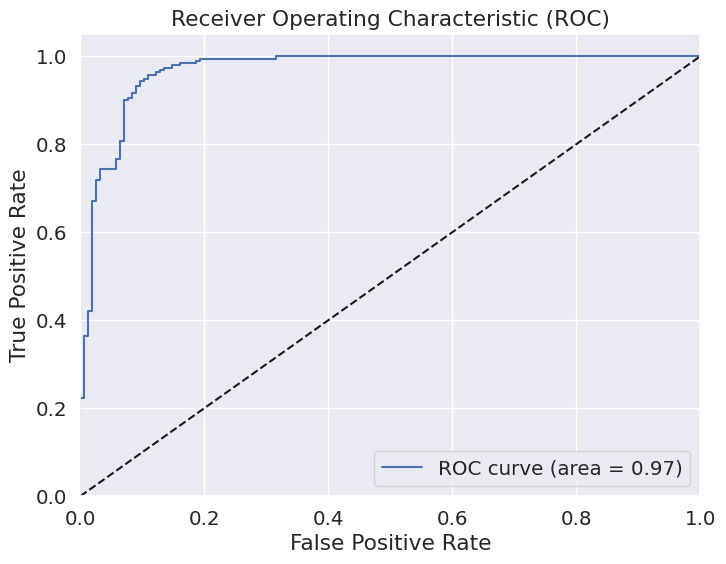

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Naive Bayes classifier
nb = MultinomialNB()

# Define the parameter grid for grid search
param_grid = {
    'alpha': [0.01, 0.1, 1]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(nb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_nb = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the target values for the test set
y_pred = best_nb.predict(X_test)

# Print the best parameters found by grid search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_nb.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()




# **SVM**

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       155
         1.0       0.88      0.95      0.91       192

    accuracy                           0.90       347
   macro avg       0.91      0.89      0.90       347
weighted avg       0.90      0.90      0.90       347

Accuracy: 0.899135446685879


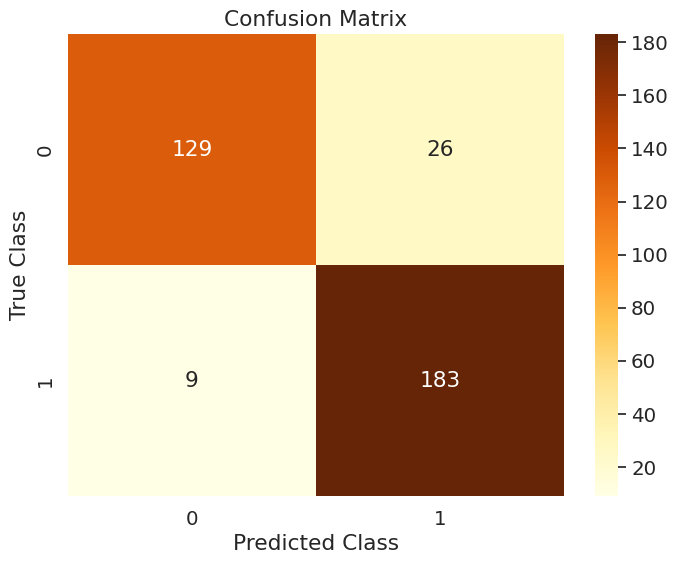

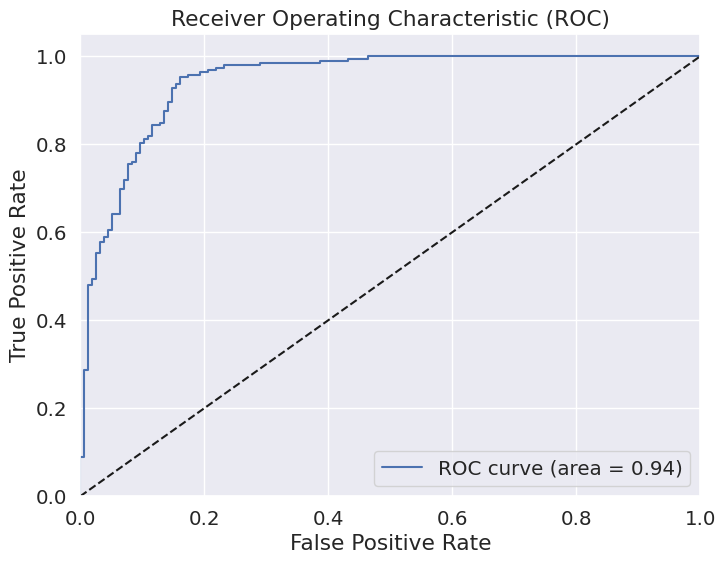

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the SVM classifier
svm = SVC()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the target values for the test set
y_pred = best_svm.predict(X_test)

# Print the best parameters found by grid search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_svm.decision_function(X_test)  # Decision function scores

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **LR**

Best Parameters: {'C': 10, 'max_iter': 1000}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       155
         1.0       0.89      0.82      0.86       192

    accuracy                           0.85       347
   macro avg       0.85      0.85      0.85       347
weighted avg       0.85      0.85      0.85       347

Accuracy: 0.8472622478386167


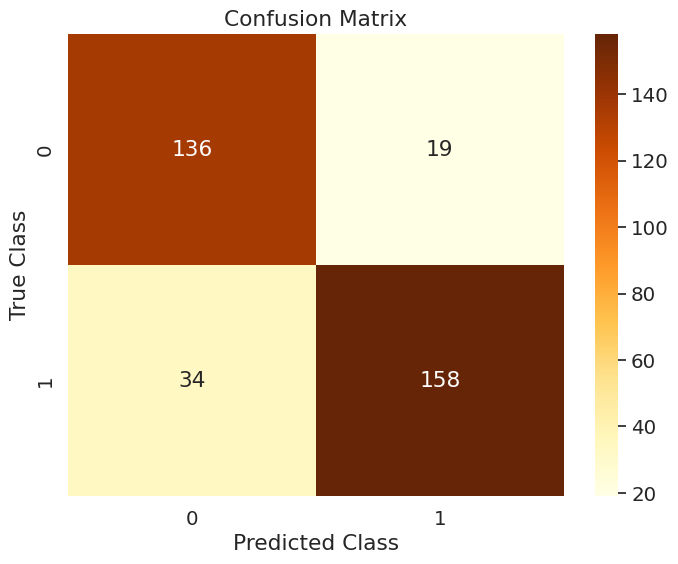

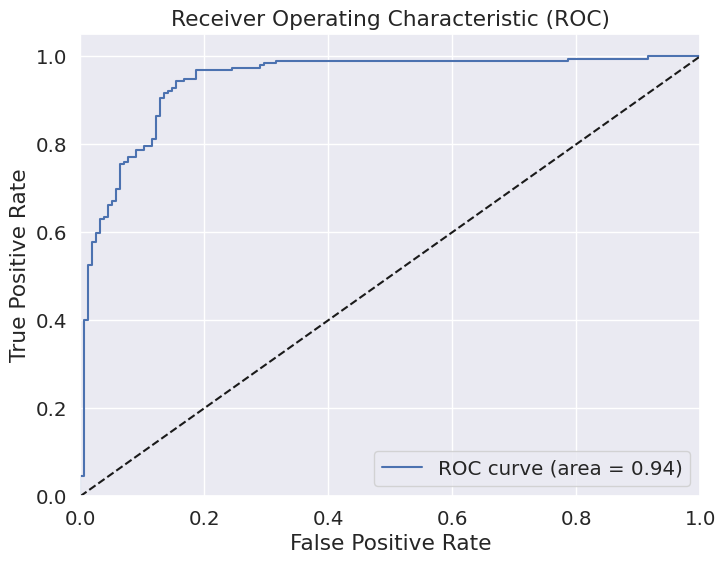

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Logistic Regression classifier
lr = LogisticRegression()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_lr = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the target values for the test set
y_pred = best_lr.predict(X_test)

# Print the best parameters found by grid search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_lr.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **RF**

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80       155
         1.0       0.81      0.94      0.87       192

    accuracy                           0.84       347
   macro avg       0.86      0.83      0.84       347
weighted avg       0.85      0.84      0.84       347

Accuracy: 0.8414985590778098


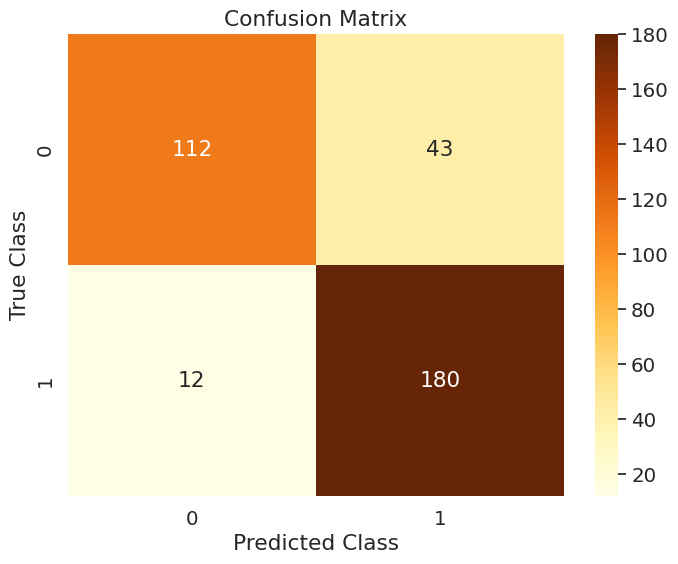

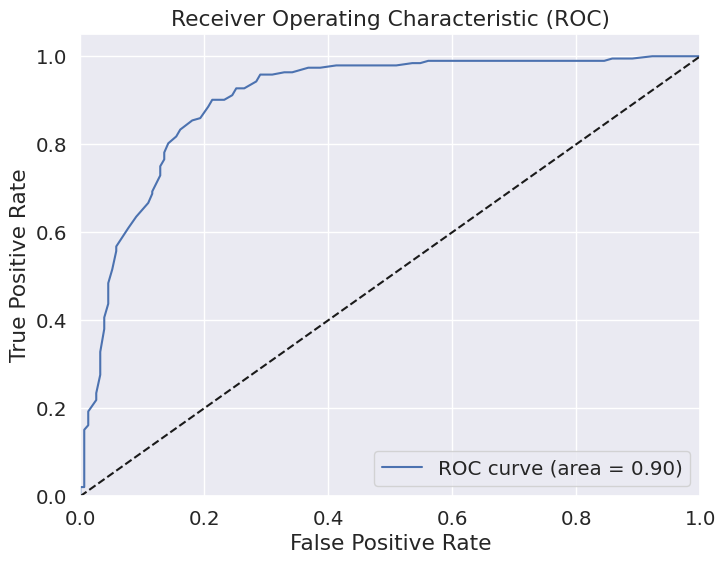

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the target values for the test set
y_pred = best_rf.predict(X_test)

# Print the best parameters found by grid search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_rf.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **Random search**

# **NB**

Best Parameters: {'alpha': 0.0010722672220103231}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       155
         1.0       0.94      0.85      0.89       192

    accuracy                           0.88       347
   macro avg       0.88      0.89      0.88       347
weighted avg       0.89      0.88      0.89       347

Accuracy: 0.8847262247838616


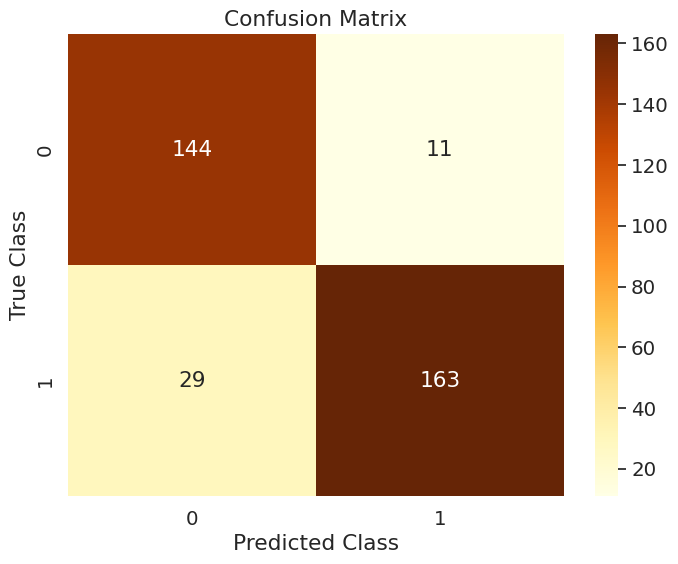

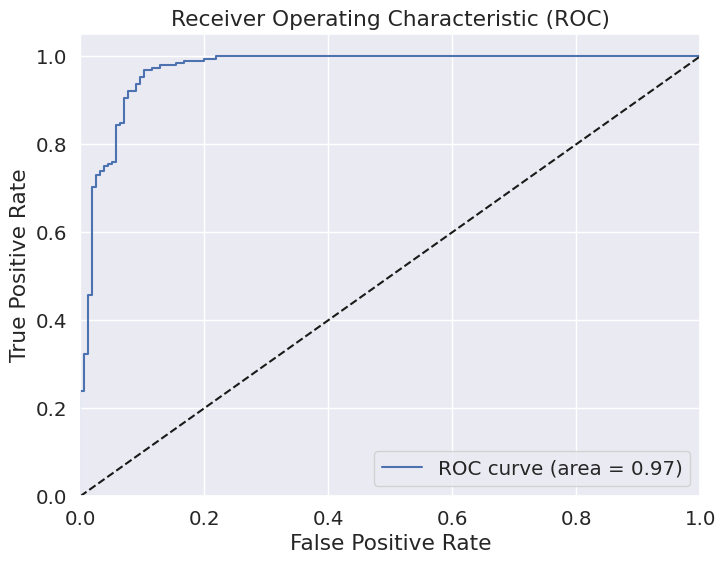

In [72]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Naive Bayes classifier
nb = MultinomialNB()

# Define the parameter distributions for random search
param_dist = {
    'alpha': np.logspace(-3, 0, 100)
}

# Perform random search to find the best parameters
random_search = RandomizedSearchCV(nb, param_distributions=param_dist, cv=5)
random_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_nb = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target values for the test set
y_pred = best_nb.predict(X_test)

# Print the best parameters found by random search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_nb.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **SVM**

Best Parameters: {'gamma': 0.06579332246575682, 'C': 53.366992312063125}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       155
         1.0       0.92      0.84      0.88       192

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.88      0.87      0.87       347

Accuracy: 0.8703170028818443


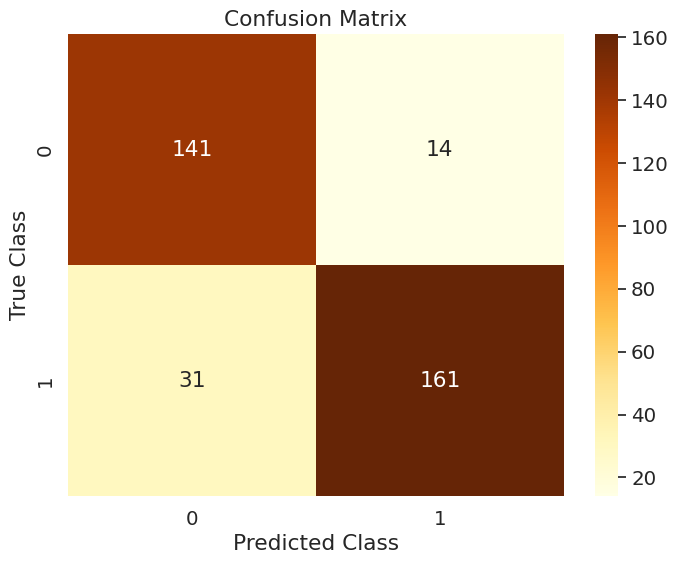

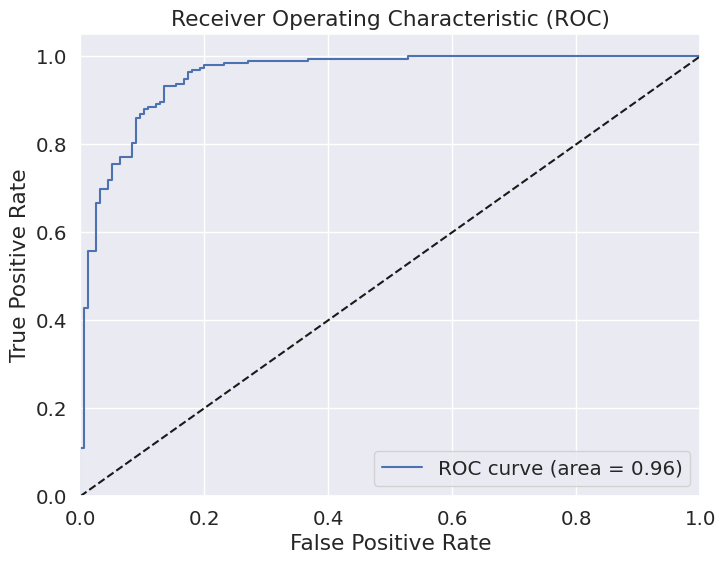

In [73]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the SVM classifier
svm = SVC()

# Define the parameter distributions for random search
param_dist = {
    'C': np.logspace(-3, 3, 100),
    'gamma': np.logspace(-3, 3, 100)
}

# Perform random search to find the best parameters
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, cv=5)
random_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_svm = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target values for the test set
y_pred = best_svm.predict(X_test)

# Print the best parameters found by random search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_svm.decision_function(X_test)

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **LR**

Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 81.11308307896873}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       155
         1.0       0.91      0.84      0.87       192

    accuracy                           0.86       347
   macro avg       0.86      0.87      0.86       347
weighted avg       0.87      0.86      0.86       347

Accuracy: 0.8645533141210374


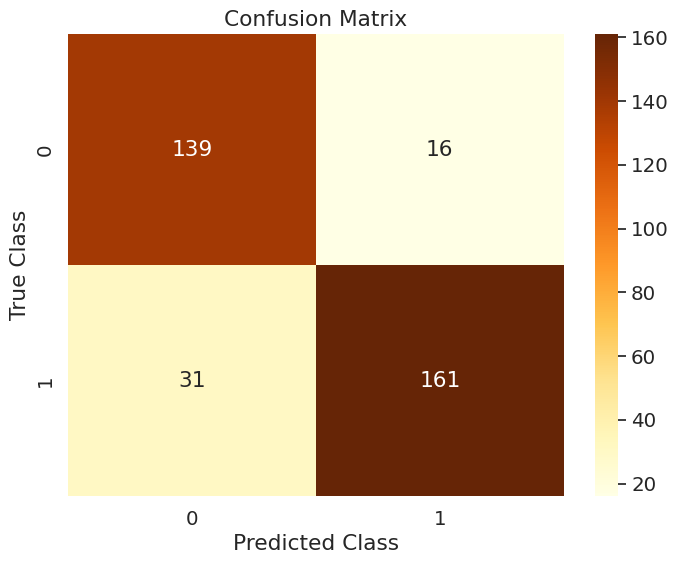

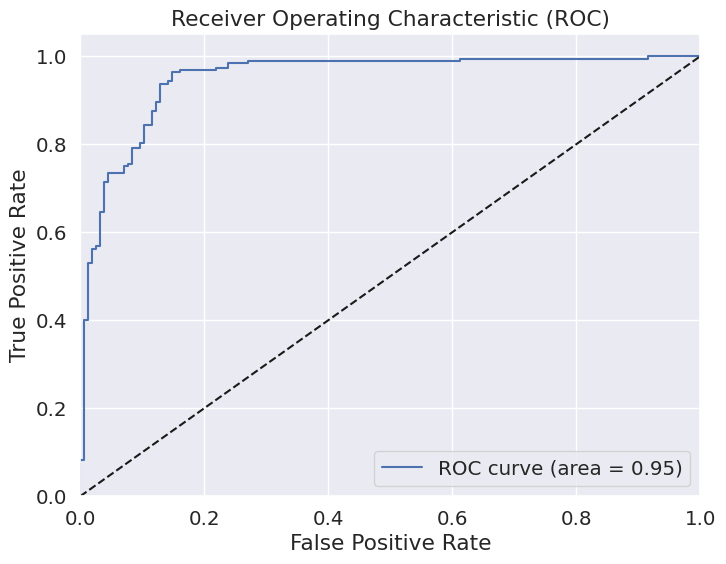

In [74]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Logistic Regression classifier
lr = LogisticRegression()

# Define the parameter distributions for random search
param_dist = {
    'C': np.logspace(-3, 3, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Perform random search to find the best parameters
random_search = RandomizedSearchCV(lr, param_distributions=param_dist, cv=5)
random_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_lr = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target values for the test set
y_pred = best_lr.predict(X_test)

# Print the best parameters found by random search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_lr.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **RF**

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.59      0.67       155
         1.0       0.72      0.86      0.79       192

    accuracy                           0.74       347
   macro avg       0.75      0.73      0.73       347
weighted avg       0.75      0.74      0.73       347

Accuracy: 0.7406340057636888


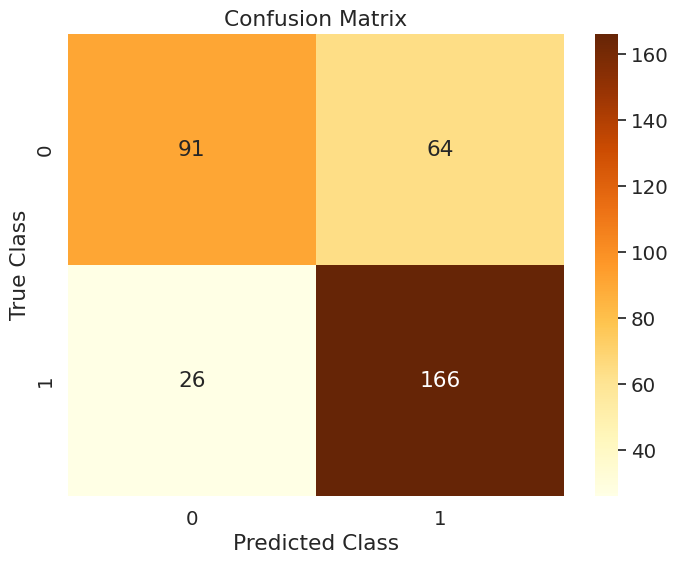

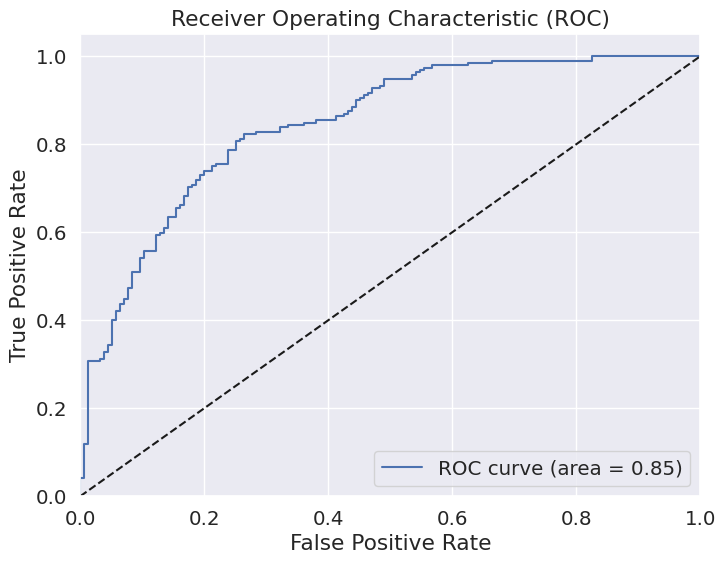

In [75]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Random Forest classifier
rf = RandomForestClassifier()

# Define the parameter distributions for random search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform random search to find the best parameters
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5)
random_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_rf = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target values for the test set
y_pred = best_rf.predict(X_test)

# Print the best parameters found by random search
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the probability estimates for the test set
y_scores = best_rf.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **Baysien**

In [76]:
pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


# **NB**

Best Parameters: OrderedDict([('alpha', 0.011587082841387868)])
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       155
         1.0       0.94      0.83      0.88       192

    accuracy                           0.87       347
   macro avg       0.87      0.88      0.87       347
weighted avg       0.88      0.87      0.87       347

Accuracy: 0.8731988472622478


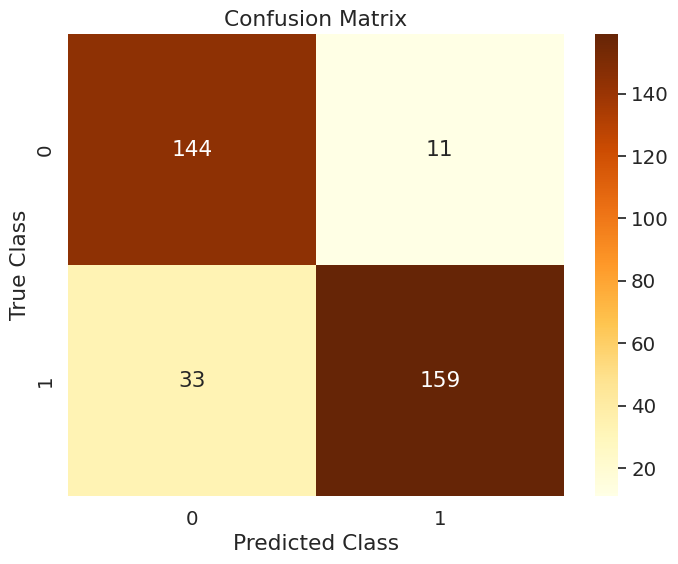

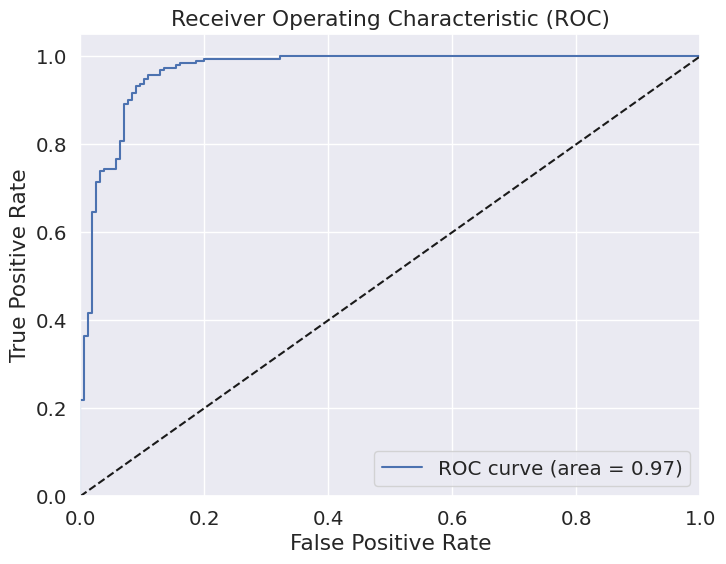

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from skopt import BayesSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Naive Bayes classifier
nb = MultinomialNB()

# Define the parameter search space for Bayesian Optimization
param_dist = {
    'alpha': (0.01, 1.0, 'log-uniform')
}

# Perform Bayesian Optimization to find the best parameters
bayes_search = BayesSearchCV(nb, param_dist, cv=5)
bayes_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_nb = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Predict the target values for the test set
y_pred = best_nb.predict(X_test)

# Print the best parameters found by Bayesian Optimization
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_nb.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **SVM**

Best Parameters: OrderedDict([('C', 1.7204511352188727), ('gamma', 0.7384226310944245)])
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       155
         1.0       0.88      0.94      0.91       192

    accuracy                           0.89       347
   macro avg       0.90      0.89      0.89       347
weighted avg       0.89      0.89      0.89       347

Accuracy: 0.8933717579250721


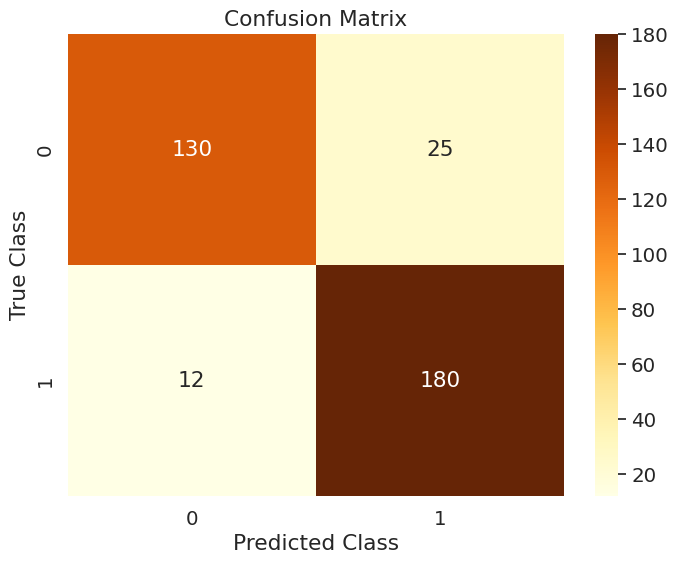

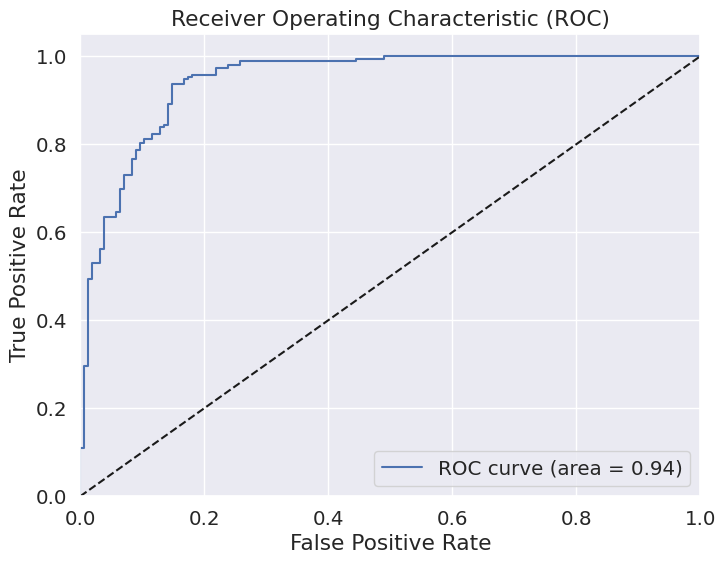

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.svm import SVC
from skopt import BayesSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the SVM classifier
svm = SVC()

# Define the parameter search space for Bayesian Optimization
param_dist = {
    'C': (0.01, 10.0, 'log-uniform'),
    'gamma': (0.001, 1.0, 'log-uniform')
}

# Perform Bayesian Optimization to find the best parameters
bayes_search = BayesSearchCV(svm, param_dist, cv=5)
bayes_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_svm = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Predict the target values for the test set
y_pred = best_svm.predict(X_test)

# Print the best parameters found by Bayesian Optimization
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_svm.decision_function(X_test)  # Decision function scores

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **RF**

Best Parameters: OrderedDict([('max_depth', 10), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 1000)])
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75       155
         1.0       0.81      0.78      0.79       192

    accuracy                           0.78       347
   macro avg       0.77      0.78      0.77       347
weighted avg       0.78      0.78      0.78       347

Accuracy: 0.7752161383285303


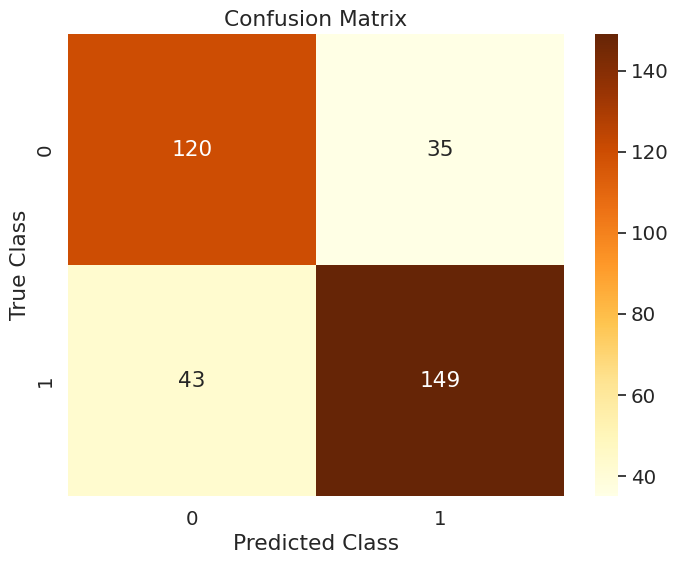

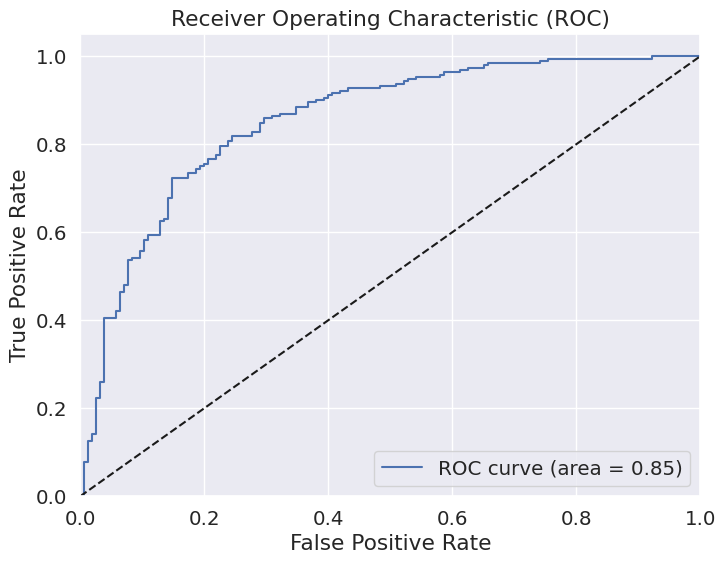

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from skopt import BayesSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Random Forest classifier
rf = RandomForestClassifier()

# Define the parameter search space for Bayesian Optimization
param_dist = {
    'n_estimators': (100, 1000),
    'max_depth': (1, 10),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10)
}

# Perform Bayesian Optimization to find the best parameters
bayes_search = BayesSearchCV(rf, param_dist, cv=5)
bayes_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_rf = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Predict the target values for the test set
y_pred = best_rf.predict(X_test)

# Print the best parameters found by Bayesian Optimization
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_rf.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# **LR**

Best Parameters: OrderedDict([('C', 756.463327554629), ('penalty', 'l2'), ('solver', 'liblinear')])
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       155
         1.0       0.91      0.84      0.88       192

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.87      0.87      0.87       347

Accuracy: 0.8674351585014409


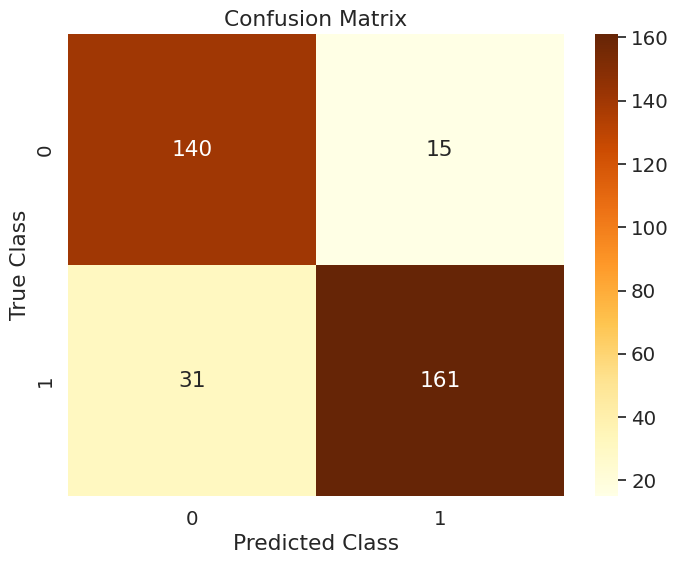

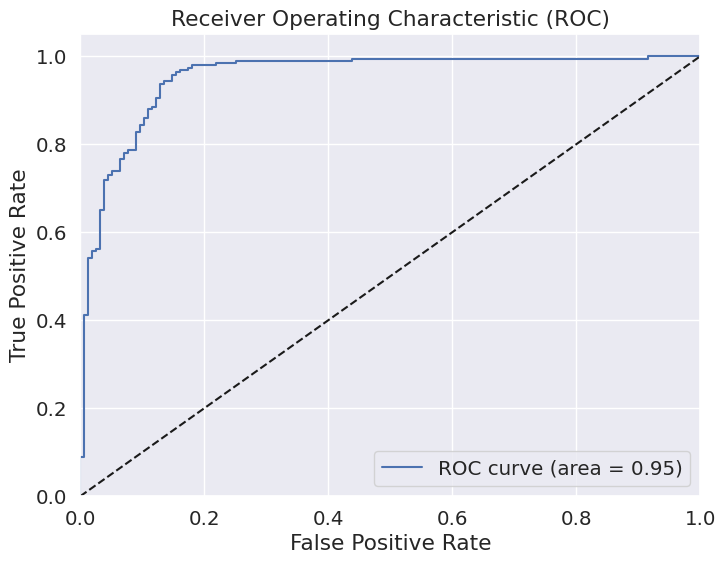

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=0)

# Define the Logistic Regression classifier
lr = LogisticRegression()

# Define the parameter search space for Bayesian Optimization
param_dist = {
    'C': np.logspace(-3, 3, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Perform Bayesian Optimization to find the best parameters
bayes_search = BayesSearchCV(lr, param_dist, cv=5)
bayes_search.fit(X_train, y_train)

# Get the best classifier with the optimized parameters
best_lr = bayes_search.best_estimator_
best_params = bayes_search.best_params_

# Predict the target values for the test set
y_pred = best_lr.predict(X_test)

# Print the best parameters found by Bayesian Optimization
print("Best Parameters:", best_params)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate the decision function scores or probability estimates for the test set
y_scores = best_lr.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
